## Examiner les données timestamp Openwhyd

This log runs from Feb 14, 2014 to April 3, 2019, and represents 25 million songs played


### imports and wrangling to get the log into the user-item-count format

In [1]:
import requests # for scraping title from yt site
from bs4 import BeautifulSoup as bs # for retrieving info on the tracks from the youtube website.

import pandas as pd
import numpy as np
import random

import implicit 

import scipy.sparse as sparse # this is what makes the csr_matrix
from scipy.sparse.linalg import spsolve
from sklearn.preprocessing import MinMaxScaler

from datetime import datetime


In [7]:
import pandas as pd
from datetime import datetime

In [4]:
# importer dataset: 

total_log = pd.read_csv('FILE_PATH_AND_NAME')


In [5]:
print (total_log.shape)
print ("nb of users:", total_log.user.nunique())
print ("nb of songs:", total_log.song.nunique())
total_log.head(5)

# NOTE - the order here is not in terms of user, it's in terms of a time stamp
# the first listed timestamp is 02/14/2014 @ 2:18pm (UTC)
# the last listed timestamp is 04/03/2019 @ 7:35pm (UTC)
# use https://www.unixtimestamp.com/index.php

(25739537, 3)
nb of users: 45904
nb of songs: 631348


,timestamp,user,song
0,1392387533,0,t1l8Z6gLPzo
1,1392387538,1,t1l8Z6gLPzo
2,1392387556,2,t1l8Z6gLPzo
3,1392387561,3,we5gzZq5Avg
4,1392387566,4,we5gzZq5Avg


In [8]:

# create a short_version of the df for testing things on 
short_version = pd.DataFrame (total_log.head(10))

# print a particular timestamp in normal date-time format
ts = int(1392387533)
print(datetime.utcfromtimestamp(ts).strftime('%Y-%d-%m %H:%M:%S'))

# add a converted date_time column as well as the timestamp column
short_version['date_time'] = pd.to_datetime(short_version['timestamp'], unit='s')


2014-14-02 14:18:53


In [9]:
short_version.head(10)

,timestamp,user,song,date_time
0,1392387533,0,t1l8Z6gLPzo,2014-02-14 14:18:53
1,1392387538,1,t1l8Z6gLPzo,2014-02-14 14:18:58
2,1392387556,2,t1l8Z6gLPzo,2014-02-14 14:19:16
3,1392387561,3,we5gzZq5Avg,2014-02-14 14:19:21
4,1392387566,4,we5gzZq5Avg,2014-02-14 14:19:26
5,1392387566,5,we5gzZq5Avg,2014-02-14 14:19:26
6,1392387574,6,49esza4eiK4,2014-02-14 14:19:34
7,1392387579,2,BoO6LfR7ca0,2014-02-14 14:19:39
8,1392387583,7,DaH4W1rY9us,2014-02-14 14:19:43
9,1392387584,2,BoO6LfR7ca0,2014-02-14 14:19:44


In [10]:
# créér un nouveau df depuis l'original pour l'enquêter sur la colonne datetime.
time_copy = pd.DataFrame (open_sample)

# add a converted date_time column as well as the timestamp column
time_copy['date_time'] = pd.to_datetime(time_copy['timestamp'], unit='s')

# add a column with just the date, and not the time so we can value_counts by date
time_copy['date'] = pd.DatetimeIndex(time_copy['date_time']).date

In [11]:
# d'abord quand on essaie de visualiser sur le temps, ca commence vers 1970. On découvre 
# qu'il y a un souci avec une ligne qui a une date de 1965. On l'enlève.

time_copy.sort_values(by='date', ascending = False).tail (5)

# drop a single row

clean_time_copy = time_copy.drop([23506305])

In [12]:
time_copy.head(5)

,timestamp,user,song,date_time,date
0,1392387533,0,t1l8Z6gLPzo,2014-02-14 14:18:53,2014-02-14
1,1392387538,1,t1l8Z6gLPzo,2014-02-14 14:18:58,2014-02-14
2,1392387556,2,t1l8Z6gLPzo,2014-02-14 14:19:16,2014-02-14
3,1392387561,3,we5gzZq5Avg,2014-02-14 14:19:21,2014-02-14
4,1392387566,4,we5gzZq5Avg,2014-02-14 14:19:26,2014-02-14


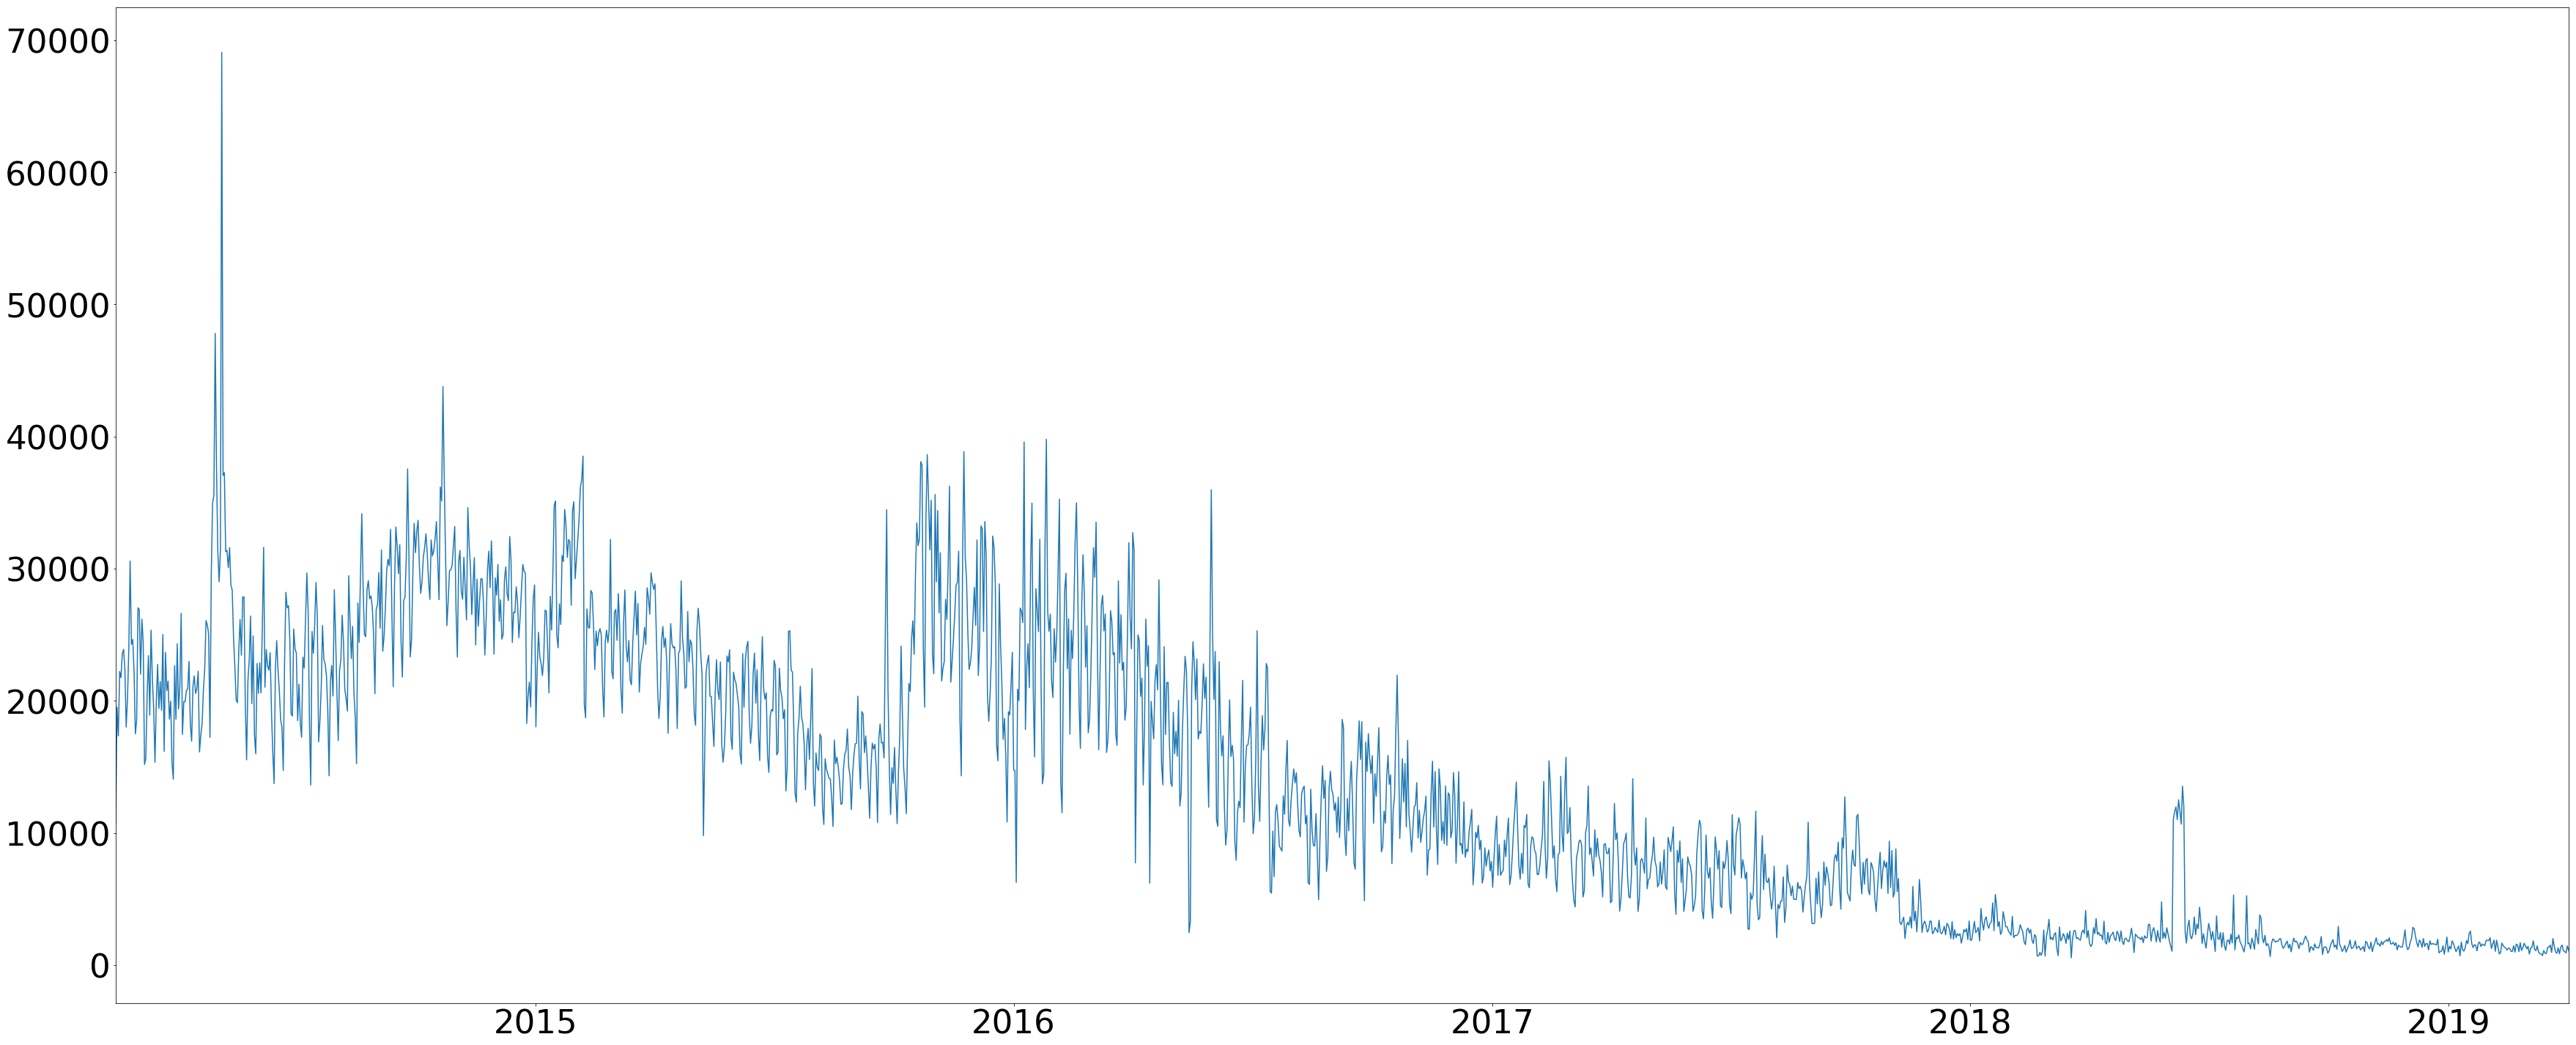

In [15]:
# without the problem row, plot the number of log events per day

clean_time_copy.date.value_counts().plot(kind = 'line', figsize = (60, 25), fontsize = (45))